# I Call This Number for a Data Date

In [81]:
from cgtnnlib.datasets import datasets

dataset = datasets[0]

print(f'Features count: {dataset.features_count}, classes count: {dataset.classes_count}')

Features count: 30, classes count: 2


In [82]:
import torch

from cgtnnlib.nn.AugmentedReLUNetwork import AugmentedReLUNetwork
from cgtnnlib.constants import NOISE_FACTORS


state_dict_paths = [
    'pth/model-1B-c-P0.9_N9.pth',
    'pth/model-1B-c-P0_N9.pth',
]

def load_model(path: str) -> AugmentedReLUNetwork:
    model = AugmentedReLUNetwork(
        inputs_count=dataset.features_count,
        outputs_count=dataset.classes_count,
        p=0.9,
    )
    model.load_state_dict(torch.load(path))
    model.eval()
    return model


models = [load_model(path) for path in state_dict_paths]
models


[AugmentedReLUNetwork(
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (fc1): Linear(in_features=30, out_features=1024, bias=True)
   (fc2): Linear(in_features=1024, out_features=1024, bias=True)
   (fc3): Linear(in_features=1024, out_features=2, bias=True)
   (custom_relu1): CustomReLULayer()
   (custom_relu2): CustomReLULayer()
 ),
 AugmentedReLUNetwork(
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (fc1): Linear(in_features=30, out_features=1024, bias=True)
   (fc2): Linear(in_features=1024, out_features=1024, bias=True)
   (fc3): Linear(in_features=1024, out_features=2, bias=True)
   (custom_relu1): CustomReLULayer()
   (custom_relu2): CustomReLULayer()
 )]

In [83]:
for inputs, labels in dataset.data.test_loader:
    break

(inputs.shape, labels.shape)

(torch.Size([12, 30]), torch.Size([12]))

{'output1': [8.126138687133789, 8.120834350585938, 8.135982513427734, 8.14743423461914, 8.078746795654297, 8.1016845703125, 8.176916122436523, 8.131113052368164, 8.163652420043945, 8.107059478759766, 8.044672012329102, 8.181720733642578, 8.15283203125, 8.131206512451172, 8.229524612426758, 8.147180557250977, 8.116371154785156, 8.115697860717773, 8.042526245117188, 7.955904006958008, 8.209407806396484, 8.041528701782227, 8.141733169555664, 8.301261901855469, 8.010143280029297, 8.099376678466797, 8.150823593139648, 7.941694259643555, 7.829673767089844, 8.063070297241211, 8.299177169799805, 8.296501159667969, 8.302553176879883, 8.34208869934082, 8.33187484741211, 8.504125595092773, 7.962118148803711, 8.158132553100586, 7.980512619018555, 7.976100921630859, 7.773700714111328, 8.234355926513672, 8.338945388793945, 8.623697280883789, 7.5533294677734375, 8.498422622680664, 7.9021453857421875, 8.278470993041992, 8.198410034179688, 8.258646011352539], 'output2': [13.30138111114502, 13.300227165

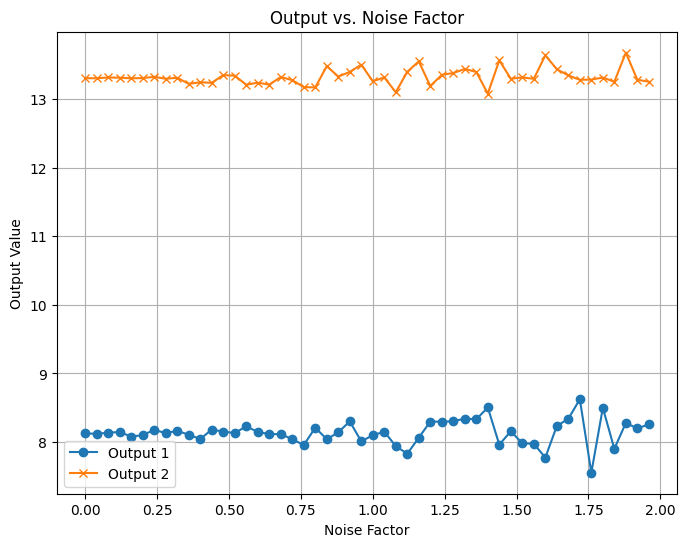

{'output1': [-1.7563201189041138, -1.7589040994644165, -1.711072325706482, -1.6517289876937866, -1.8683737516403198, -1.827978253364563, -1.6851822137832642, -1.8466886281967163, -1.9896432161331177, -1.7776814699172974, -1.9158657789230347, -1.555388331413269, -1.5904103517532349, -1.4369646310806274, -2.1047353744506836, -1.7038904428482056, -1.4398740530014038, -1.3553274869918823, -1.3317073583602905, -1.7674742937088013, -1.5337671041488647, -2.1998350620269775, -1.3282719850540161, -2.4463629722595215, -1.4288002252578735, -2.21480393409729, -1.2378567457199097, -2.1101584434509277, -2.1198792457580566, -1.9670945405960083, -1.4499558210372925, -1.6415880918502808, -2.4601240158081055, -1.2441576719284058, -1.2779439687728882, -1.9170483350753784, -1.1631830930709839, -2.116021156311035, -2.591622829437256, -1.6746667623519897, -0.870104193687439, -1.1954158544540405, -2.3096084594726562, -2.1225686073303223, -1.74819815158844, -1.4885674715042114, -2.468507766723633, 0.605525135

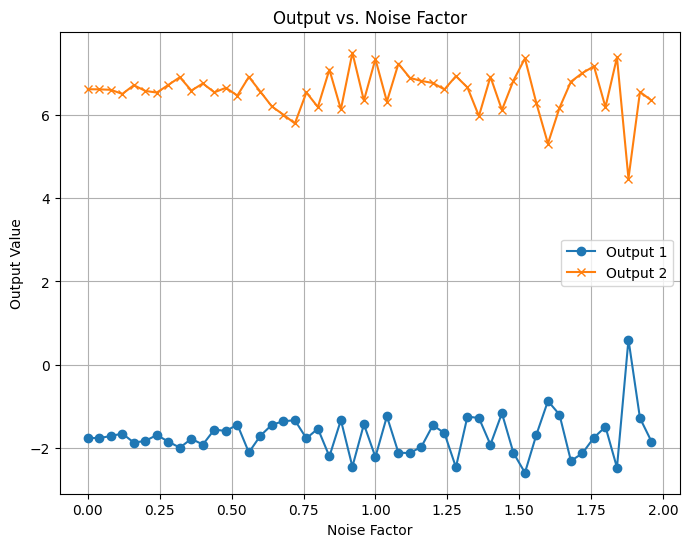

In [84]:
import matplotlib.pyplot as plt

for model in models:
    result = {
        'output1': [],
        'output2': [],
        'noise_factor': []
    }

    for noise_factor in NOISE_FACTORS:
        outputs = model(
            inputs + torch.randn(inputs.shape) * noise_factor
        )
        i = 5
        result['output1'].append(outputs[i][0].item())
        result['output2'].append(outputs[i][1].item())
        result['noise_factor'].append(noise_factor)

    print(result)
    
    # Create the plot
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.plot(result['noise_factor'], result['output1'], label='Output 1', marker='o')  # Plot output1
    plt.plot(result['noise_factor'], result['output2'], label='Output 2', marker='x')  # Plot output2

    # Add labels and title
    plt.xlabel('Noise Factor')
    plt.ylabel('Output Value')
    plt.title('Output vs. Noise Factor')

    # Add a legend
    plt.legend()

    # Add a grid for readability
    plt.grid(True)

    # Show the plot
    plt.show()